<a href="https://colab.research.google.com/github/anchal-rai/ml/blob/main/PricePrediction(AnchalRai_2201330100301).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Analyze and prediction of housing dataset to predict house rent prize using multiple linear regression algorithm
# Task 1 Gathering the datset
# cleaning and data preprocessing
#  selection of particular algorithm
# evaluate the model to achieve maximum accuracy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Housing.csv')

In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
# Convert categoriacl features to numerical
# ta = pd.DataFrame()
ta=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True)
ta['mainroad']=df['mainroad'].map({'yes':1,'no':0})
ta['guestroom']=df['guestroom'].map({'yes':1,'no':0})
ta['basement']=df['basement'].map({'yes':1,'no':0})
ta['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
ta['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
ta['prefarea']=df['prefarea'].map({'yes':1,'no':0})
print(ta)



        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [ ]:
data=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True)
data['mainroad']=df['mainroad'].map({'yes':1,'no':0})
data['guestroom']=df['guestroom'].map({'yes':1,'no':0})
data['basement']=df['basement'].map({'yes':1,'no':0})
data['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
data['prefarea']=df['prefarea'].map({'yes':1,'no':0})

# Selecting the target and features
print(data.head())
X=data[['area','bedrooms','bathrooms','stories','parking']]
Y=data['price']

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

In [ ]:
 X = data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','parking','stories','bathrooms','bedrooms','area']]  # Select features
 Y = data['price']  # Select target
# split model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# predict
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean squared Error ;",mse)
print("R-squared",r2)

Mean squared Error ; 1800793719718.9915
R-squared 0.6437296086614068


Text(0.5, 1.0, 'Residual\xa0Plot')

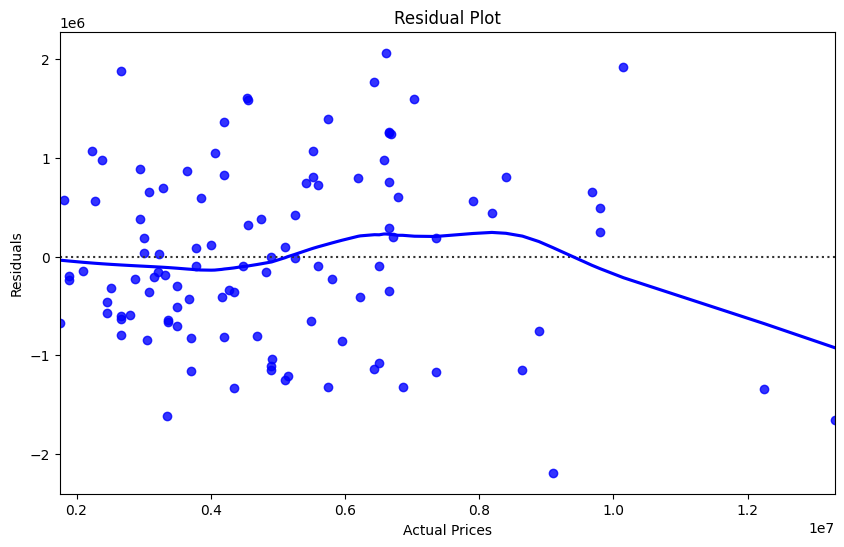

In [ ]:
# residual #Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess =True, color ='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")


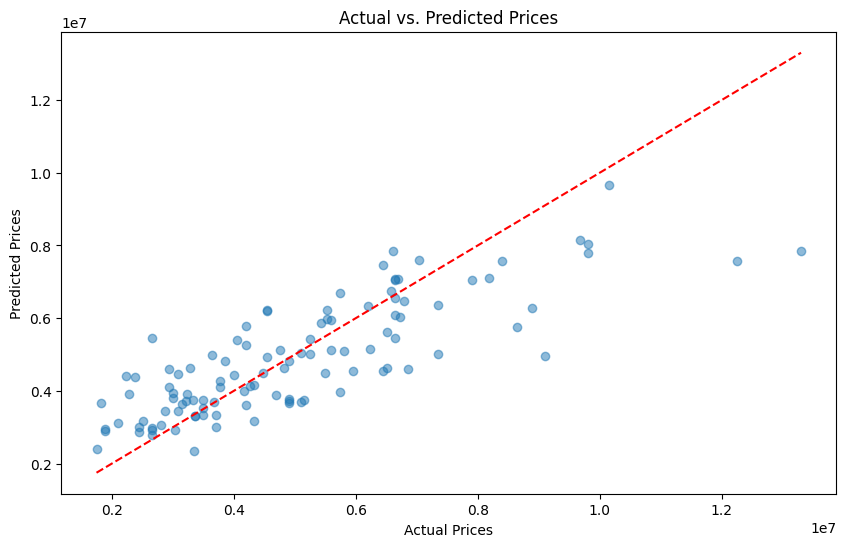

In [ ]:
#Scatter plot of actual vs predict price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


In [ ]:
# take user input for predictions

area=float(input("Enter the area of the house:"))
bedrooms=int(input("Enter the number of bedrooms:"))
bathrooms=int(input("Enter the number of bathrooms:"))
stories=int(input("Enter the number of stories:"))
parking=int(input("Enter the number of parking spaces:"))

# Create a dataframe for prediction

user_input=pd.DataFrame({'area':[area],'bedrooms':[bedrooms],'bathrooms':[bathrooms],'stories':[stories],'parking':[parking]})

# predict price
predicted_price=model.predict(user_input)
print("Predicted price for the house:",predicted_price[0])


Enter the area of the house:12
Enter the number of bedrooms:12
Enter the number of bathrooms:1
Enter the number of stories:2
Enter the number of parking spaces:2


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- airconditioning
- basement
- guestroom
- hotwaterheating
- mainroad
- ...
